## Testing predictions

In [55]:
#lib imports
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#local imports
from utils import *
from image_processing import *

print('TensorFlow version: ', tf.__version__)
print('Keras version: ', keras.__version__)
print('Python version: ', os.sys.version)

TensorFlow version:  2.16.1
Keras version:  3.1.1
Python version:  3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:42:31) [MSC v.1937 64 bit (AMD64)]


In [56]:
model_name = 'cnn_reguliarized.h5'
model_dir = './models'

model = load_model(model_name, model_dir)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,247,365 (84.87 MB)

 Trainable params: 22,246,403 (84.86 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 2 (12.00 B)

(1, 224, 224, 3)
[[[[0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   ...
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]]

  [[0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   ...
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]]

  [[0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   ...
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]]

  ...

  [[0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   ...
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]
   [0.14901961 0.5882353  0.24313726]]

  [[0.14901961 0.5882353  0.

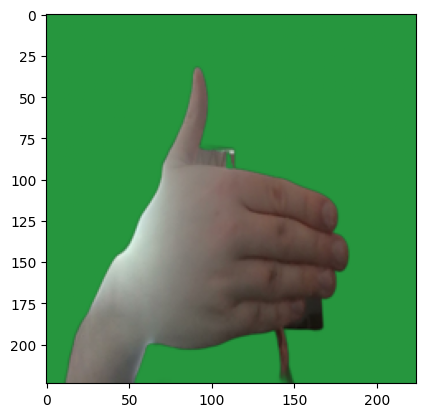

In [57]:
predict_dir = 'predict_images'

if not os.path.exists(predict_dir):
    os.makedirs(predict_dir)

predict_image = '14.jpg'
predict_image_path = os.path.join(predict_dir, predict_image)

prepared_image = prepare_image_for_prediction(predict_image_path)
print(prepared_image.shape)
print(prepared_image)
plt.imshow(prepared_image[0])

predictions = model.predict(prepared_image)
print(predictions)
classes = ['paper', 'rock', 'scissors']
predicted_class = classes[np.argmax(predictions)]
print(predicted_class)